# <h1 align=center> **ETL - TOP 10** </h1>
## <h1 align=center> (Extract, Transform, Load) </h1>

Para el desarrollo de la primera fase de este proyecto, realizaré la aplicación del proceso ETL, el cuál básicamente consiste en `“Extraer”` los datos crudos desde su origen (Source), `“Transformarlos”` según nuestras necesidades de analítica o la estructura que deseamos y `“Cargarlos”` a una base de datos orientada a procesos analíticos (Target).

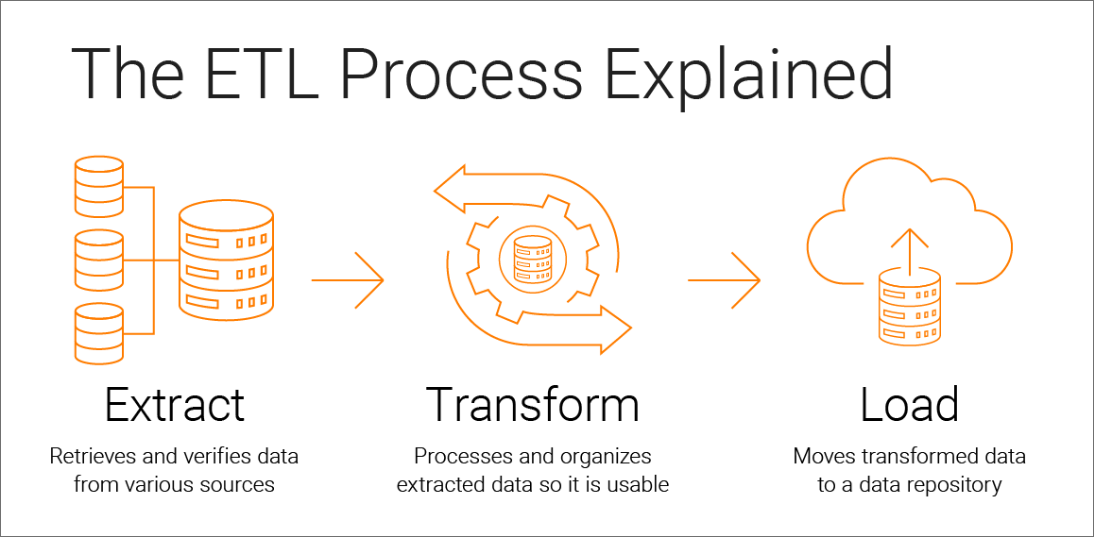

Como fase previa a la aplicación del ETL, se realizará la importación de librerías que serán de utilidad en el desarrollo del proceso, las cuales son:

In [1]:
from pycoingecko import CoinGeckoAPI
import json
import requests
import os
import pandas as pd
import datetime
import time
import ccxt

# <h1 align=left>**`Extract: Top 10 de Criptomonedas`**</h1>

Teniendo en cuenta que la información se va a descargar de la API de la plataforma CoinGecko, en este punto se extrae información de las funciones de la API, se almacenan en `DataFrames` de la librería de `Pandas` y posteriormente se crean `Datasets` extructurados en archivos `.csv`.

**0.** Como fase previa se consulta los datos globales de **`CoinGecko`** para identificar con qué datos se cuenta.

In [5]:
global_data = cg.get_global()
df = pd.DataFrame([global_data])
df.head()

,active_cryptocurrencies,upcoming_icos,ongoing_icos,ended_icos,markets,total_market_cap,total_volume,market_cap_percentage,market_cap_change_percentage_24h_usd,updated_at
0,10187,0,49,3376,837,"{'btc': 41814831.23135731, 'eth': 662365454.39...","{'btc': 1701178.3755727233, 'eth': 26947419.24...","{'btc': 46.553979597081145, 'eth': 18.14864457...",1.581864,1692869408


**1.** Se consulta la data contenida en el punto _`get_coins_markets`_ para identificar la información contenida en el.

In [2]:
cg=CoinGeckoAPI()
all_coins_market = cg.get_coins_markets(vs_currency ='usd')
all_coins_market_df = pd.DataFrame(all_coins_market)
all_coins_market_df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26499.000000,515578221685,1,5.561945e+11,1.167092e+10,26668.000000,...,2.100000e+07,2.100000e+07,69045.00,-61.63826,2021-11-10T14:24:11.849Z,67.810000,38960.85526,2013-07-06T00:00:00.000Z,None,2023-08-24T09:22:46.639Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1673.290000,201072640129,2,2.010726e+11,9.189454e+09,1689.230000,...,1.202142e+08,NaN,4878.26,-65.71325,2021-11-10T14:24:19.604Z,0.432979,386199.94051,2015-10-20T00:00:00.000Z,"{'times': 83.42239716982051, 'currency': 'btc'...",2023-08-24T09:22:41.104Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998146,82692196441,3,8.269220e+10,1.612055e+10,1.004000,...,8.284578e+10,NaN,1.32,-24.55977,2018-07-24T00:00:00.000Z,0.572521,74.34228,2015-03-02T00:00:00.000Z,None,2023-08-24T09:20:01.736Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,219.470000,33760780400,4,4.388616e+10,5.143518e+08,220.170000,...,1.538562e+08,2.000000e+08,686.31,-68.04716,2021-05-10T07:24:17.097Z,0.039818,550646.24333,2017-10-19T00:00:00.000Z,None,2023-08-24T09:22:45.211Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.525597,27781146076,5,5.250226e+10,8.660718e+08,0.534396,...,9.998849e+10,1.000000e+11,3.40,-84.55427,2018-01-07T00:00:00.000Z,0.002686,19441.14557,2014-05-22T00:00:00.000Z,None,2023-08-24T09:22:46.147Z


**2.** Se muestran todas las columnas para mayor comprensión de la Data.

In [3]:
pd.set_option('display.max_columns', None)
all_coins_market_df.head(3)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26499.000000,515578221685,1,5.561945e+11,1.167092e+10,26668.000,25816.000000,489.210000,1.88090,9.198538e+09,1.81653,1.946647e+07,2.100000e+07,21000000.0,69045.00,-61.63826,2021-11-10T14:24:11.849Z,67.810000,38960.85526,2013-07-06T00:00:00.000Z,None,2023-08-24T09:22:46.639Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1673.290000,201072640129,2,2.010726e+11,9.189454e+09,1689.230,1636.160000,29.690000,1.80628,3.445022e+09,1.74319,1.202142e+08,1.202142e+08,NaN,4878.26,-65.71325,2021-11-10T14:24:19.604Z,0.432979,386199.94051,2015-10-20T00:00:00.000Z,"{'times': 83.42239716982051, 'currency': 'btc'...",2023-08-24T09:22:41.104Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998146,82692196441,3,8.269220e+10,1.612055e+10,1.004,0.996029,-0.001404,-0.14041,-1.350563e+08,-0.16306,8.284578e+10,8.284578e+10,NaN,1.32,-24.55977,2018-07-24T00:00:00.000Z,0.572521,74.34228,2015-03-02T00:00:00.000Z,None,2023-08-24T09:20:01.736Z


**3.** Teniendo en cuenta que en la base global se maneja un total de **10187** criptomonedas, para el presente proyecto se tomará como referencia las `10 primeras criptomonedas` ubicadas en el ranking de market cap.

In [6]:
top_10_coins = all_coins_market_df.sort_values(by='market_cap_rank').head(10)
pd.set_option('display.max_columns', None)
top_10_coins.head(3)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26499.000000,515578221685,1,5.561945e+11,1.167092e+10,26668.000,25816.000000,489.210000,1.88090,9.198538e+09,1.81653,1.946647e+07,2.100000e+07,21000000.0,69045.00,-61.63826,2021-11-10T14:24:11.849Z,67.810000,38960.85526,2013-07-06T00:00:00.000Z,None,2023-08-24T09:22:46.639Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1673.290000,201072640129,2,2.010726e+11,9.189454e+09,1689.230,1636.160000,29.690000,1.80628,3.445022e+09,1.74319,1.202142e+08,1.202142e+08,NaN,4878.26,-65.71325,2021-11-10T14:24:19.604Z,0.432979,386199.94051,2015-10-20T00:00:00.000Z,"{'times': 83.42239716982051, 'currency': 'btc'...",2023-08-24T09:22:41.104Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998146,82692196441,3,8.269220e+10,1.612055e+10,1.004,0.996029,-0.001404,-0.14041,-1.350563e+08,-0.16306,8.284578e+10,8.284578e+10,NaN,1.32,-24.55977,2018-07-24T00:00:00.000Z,0.572521,74.34228,2015-03-02T00:00:00.000Z,None,2023-08-24T09:20:01.736Z


# <h1 align=left>**`Transform: Top 10 de Criptomonedas`**</h1>

En este punto aplicaré algunas transformaciones al _Dataframe_ para generar un Dataset útil para el momento de realizar un buen proceso de _`Exploratory Data Analysis-EDA`_, estas reglas pueden incluir procesos como:

+ Filtrar filas por ciertas características.
+ Eliminar duplicados.
+ Transformar datos.
+ Calcular datos nuevos.
+ Extraer datos.
+ Unir o combinar datos de distintas fuentes.
+ Desanidar datos de columnas que contienen un diccionario o una lista como valores en cada fila.
+ Entre otros.

**4.** Redondear las columnas numéricas a 2 decimales.

In [7]:
numeric_columns = ['current_price', 
                'market_cap', 
                'fully_diluted_valuation', 
                'total_volume', 
                'high_24h', 
                'low_24h', 
                'price_change_24h', 
                'price_change_percentage_24h', 
                'market_cap_change_24h', 
                'market_cap_change_percentage_24h', 
                'circulating_supply', 
                'total_supply',
                'max_supply',
                'ath',
                'ath_change_percentage',
                'atl',
                'atl_change_percentage'
                ]
top_10_coins[numeric_columns] = top_10_coins[numeric_columns].round(2)
pd.set_option('display.max_columns', None)
top_10_coins.head(3)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26499.00,515578221685,1,5.561945e+11,1.167092e+10,26668.00,25816.00,489.21,1.88,9.198538e+09,1.82,1.946647e+07,2.100000e+07,21000000.0,69045.00,-61.64,2021-11-10T14:24:11.849Z,67.81,38960.86,2013-07-06T00:00:00.000Z,None,2023-08-24T09:22:46.639Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1673.29,201072640129,2,2.010726e+11,9.189454e+09,1689.23,1636.16,29.69,1.81,3.445022e+09,1.74,1.202142e+08,1.202142e+08,NaN,4878.26,-65.71,2021-11-10T14:24:19.604Z,0.43,386199.94,2015-10-20T00:00:00.000Z,"{'times': 83.42239716982051, 'currency': 'btc'...",2023-08-24T09:22:41.104Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,82692196441,3,8.269220e+10,1.612055e+10,1.00,1.00,-0.00,-0.14,-1.350563e+08,-0.16,8.284578e+10,8.284578e+10,NaN,1.32,-24.56,2018-07-24T00:00:00.000Z,0.57,74.34,2015-03-02T00:00:00.000Z,None,2023-08-24T09:20:01.736Z


**5.** Convertir las columnas de fecha a tipo `datetime`.

In [8]:
date_columns = ['ath_date',
                'atl_date',
                'last_updated'
                ]
for col in date_columns:
    top_10_coins[col] = pd.to_datetime(top_10_coins[col], errors='coerce', utc=True)
    top_10_coins[col] = top_10_coins[col].dt.strftime('%Y-%m-%d')  # Sobreescribir la columna original con la versión formateada

pd.set_option('display.max_columns', None)
top_10_coins

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26499.00,515578221685,1,5.561945e+11,1.167092e+10,26668.00,25816.00,489.21,1.88,9.198538e+09,1.82,1.946647e+07,2.100000e+07,2.100000e+07,69045.00,-61.64,2021-11-10,67.81,38960.86,2013-07-06,None,2023-08-24
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1673.29,201072640129,2,2.010726e+11,9.189454e+09,1689.23,1636.16,29.69,1.81,3.445022e+09,1.74,1.202142e+08,1.202142e+08,NaN,4878.26,-65.71,2021-11-10,0.43,386199.94,2015-10-20,"{'times': 83.42239716982051, 'currency': 'btc'...",2023-08-24
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.00,82692196441,3,8.269220e+10,1.612055e+10,1.00,1.00,-0.00,-0.14,-1.350563e+08,-0.16,8.284578e+10,8.284578e+10,NaN,1.32,-24.56,2018-07-24,0.57,74.34,2015-03-02,None,2023-08-24
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,219.47,33760780400,4,4.388616e+10,5.143518e+08,220.17,213.05,4.24,1.97,6.355919e+08,1.92,1.538562e+08,1.538562e+08,2.000000e+08,686.31,-68.05,2021-05-10,0.04,550646.24,2017-10-19,None,2023-08-24
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.53,27781146076,5,5.250226e+10,8.660718e+08,0.53,0.52,0.01,1.28,3.859036e+08,1.41,5.291419e+10,9.998849e+10,1.000000e+11,3.40,-84.55,2018-01-07,0.00,19441.15,2014-05-22,None,2023-08-24
5,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.00,25980333747,6,2.598443e+10,2.760001e+09,1.01,1.00,-0.00,-0.06,6.747707e+07,0.26,2.598646e+10,2.599056e+10,NaN,1.17,-14.74,2019-05-08,0.88,13.92,2023-03-11,None,2023-08-24
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1672.56,13967668598,7,1.396767e+10,7.952302e+06,1688.98,1635.14,30.92,1.88,2.848005e+08,2.08,8.352502e+06,8.352502e+06,8.352502e+06,4829.57,-65.32,2021-11-10,482.90,246.81,2020-12-22,None,2023-08-24
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.27,9371547925,8,1.203365e+10,1.744798e+08,0.27,0.26,0.01,2.86,2.543269e+08,2.79,3.504502e+10,4.500000e+10,4.500000e+10,3.09,-91.34,2021-09-02,0.02,1288.97,2020-03-13,None,2023-08-24
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.06,8943913274,9,8.943902e+09,2.658326e+08,0.06,0.06,0.00,0.46,3.219698e+07,0.36,1.407189e+11,1.407187e+11,NaN,0.73,-91.31,2021-05-08,0.00,73036.29,2015-05-06,None,2023-08-24
9,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,21.74,8854943657,10,1.206601e+10,4.228407e+08,21.97,20.47,0.98,4.72,3.831258e+08,4.52,4.077711e+08,5.556410e+08,NaN,259.96,-91.64,2021-11-06,0.50,4241.74,2020-05-11,None,2023-08-24


**6.** Se eliminan las columnas que no se van a requerir en ningún proceso.

In [9]:
top_10_coins.drop(['image'], axis=1, inplace=True)
top_10_coins.drop(['roi'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
top_10_coins

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,26499.00,515578221685,1,5.561945e+11,1.167092e+10,26668.00,25816.00,489.21,1.88,9.198538e+09,1.82,1.946647e+07,2.100000e+07,2.100000e+07,69045.00,-61.64,2021-11-10,67.81,38960.86,2013-07-06,2023-08-24
1,ethereum,eth,Ethereum,1673.29,201072640129,2,2.010726e+11,9.189454e+09,1689.23,1636.16,29.69,1.81,3.445022e+09,1.74,1.202142e+08,1.202142e+08,NaN,4878.26,-65.71,2021-11-10,0.43,386199.94,2015-10-20,2023-08-24
2,tether,usdt,Tether,1.00,82692196441,3,8.269220e+10,1.612055e+10,1.00,1.00,-0.00,-0.14,-1.350563e+08,-0.16,8.284578e+10,8.284578e+10,NaN,1.32,-24.56,2018-07-24,0.57,74.34,2015-03-02,2023-08-24
3,binancecoin,bnb,BNB,219.47,33760780400,4,4.388616e+10,5.143518e+08,220.17,213.05,4.24,1.97,6.355919e+08,1.92,1.538562e+08,1.538562e+08,2.000000e+08,686.31,-68.05,2021-05-10,0.04,550646.24,2017-10-19,2023-08-24
4,ripple,xrp,XRP,0.53,27781146076,5,5.250226e+10,8.660718e+08,0.53,0.52,0.01,1.28,3.859036e+08,1.41,5.291419e+10,9.998849e+10,1.000000e+11,3.40,-84.55,2018-01-07,0.00,19441.15,2014-05-22,2023-08-24
5,usd-coin,usdc,USD Coin,1.00,25980333747,6,2.598443e+10,2.760001e+09,1.01,1.00,-0.00,-0.06,6.747707e+07,0.26,2.598646e+10,2.599056e+10,NaN,1.17,-14.74,2019-05-08,0.88,13.92,2023-03-11,2023-08-24
6,staked-ether,steth,Lido Staked Ether,1672.56,13967668598,7,1.396767e+10,7.952302e+06,1688.98,1635.14,30.92,1.88,2.848005e+08,2.08,8.352502e+06,8.352502e+06,8.352502e+06,4829.57,-65.32,2021-11-10,482.90,246.81,2020-12-22,2023-08-24
7,cardano,ada,Cardano,0.27,9371547925,8,1.203365e+10,1.744798e+08,0.27,0.26,0.01,2.86,2.543269e+08,2.79,3.504502e+10,4.500000e+10,4.500000e+10,3.09,-91.34,2021-09-02,0.02,1288.97,2020-03-13,2023-08-24
8,dogecoin,doge,Dogecoin,0.06,8943913274,9,8.943902e+09,2.658326e+08,0.06,0.06,0.00,0.46,3.219698e+07,0.36,1.407189e+11,1.407187e+11,NaN,0.73,-91.31,2021-05-08,0.00,73036.29,2015-05-06,2023-08-24
9,solana,sol,Solana,21.74,8854943657,10,1.206601e+10,4.228407e+08,21.97,20.47,0.98,4.72,3.831258e+08,4.52,4.077711e+08,5.556410e+08,NaN,259.96,-91.64,2021-11-06,0.50,4241.74,2020-05-11,2023-08-24


# <h1 align=left>**`Load: Top 10 de Criptomonedas`**</h1>

**7.** Teniendo lista la información con los datos deseados se procede con la creación del nuevo Dataset.

In [11]:
top_10_coins.to_csv("..\Datasets\Top_10_criptomonedas.csv")